# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
    
# Send the browser to the URL
browser.visit(url)

# Save the HTML from the browser
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# pandas read_html function to scrape the table
df_test = pd.read_html(url)
df_test

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
# Create a Beautiful Soup Object
html_soup = soup(html, 'html.parser')
html_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [6]:
# Extract all rows of data
weather_table = html_soup.find('table', {'class':"table"})
weather_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create a list of headers for the columns
# Create an empty list
header_list = []
# Loop through the scraped data to create a list of column headers called header_list
for tr in weather_table.find_all('tr'):
    for th in tr.find_all('th'):
        header_list.append(th.text)

In [8]:
# Create a list of data for the columns
# Create an empty list
data_list = []
# Loop through the scraped data to create a list of column data called data_list
for tr in weather_table.find_all('tr')[1:]:
    td = tr.find_all('td')
    td_value = [col.text for col in td]
    data_list.append(td_value)

In [9]:
# verify the headers
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [10]:
# verify the data
data_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list,columns=header_list)

In [12]:
# Confirm DataFrame was created successfully
df

id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
## integer type columns
df[['id', 'sol','ls','month']] = df[['id', 'sol','ls','month']].astype(int)
## float type columns
df[['min_temp','pressure']] = df[['min_temp','pressure']].astype(float)
## date type column
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], format='%Y-%m-%d')

In [15]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mon_nums = df['month'].max()
print(f'Mars has {mon_nums} months.')

Mars has 12 months.


In [17]:
# 2. How many Martian days' worth of data are there?
sols_data = df['sol'].max()
print(f'Mars has {sols_data} Martian days (sols) of data collected.')

Mars has 1977 Martian days (sols) of data collected.


In [18]:
# 3. What is the average low temperature by month?
avg_temp = df[['month', 'min_temp']].groupby('month').mean()
avg_temp = round(avg_temp,2)
avg_temp

min_temp
month          
1        -77.16
2        -79.93
3        -83.31
4        -82.75
5        -79.31
6        -75.30
7        -72.28
8        -68.38
9        -69.17
10       -71.98
11       -71.99
12       -74.45

In [19]:
# Plot the average temperature by month
# avg_temp_chart_pd = pd.DataFrame(avg_temp)
# avg_temp_chart_pd.plot(kind='bar', color='teal', legend=None, )

# Plot the average temperature by month
##  ascending order
avg_temp_sorted = avg_temp.groupby(['month'])['min_temp'].mean().sort_values(ascending=False)
avg_temp_sorted.plot(kind='bar', color='teal', legend=None, )

# descriptives
plt.title('Mars Average Temperature by Month (in Temperature Order)')
plt.xlabel('Mars Month')
plt.ylabel('Average Temperature °C')
plt.xticks(rotation=0, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
# save to file
plt.savefig("Images/Mars Average Temperature by Month")

# plt.show()

In [20]:
# Identify the coldest and hottest months in Curiosity's location

## coldest month
cold_mon = df.iloc[df['min_temp'].idxmin()]['month']

## hottest month
hot_mon = df.iloc[df['min_temp'].idxmax()]['month']

print(f'Given Curiosity\'s location, the coldest month is {cold_mon} and the hottest month is {hot_mon}.')

Given Curiosity's location, the coldest month is 3 and the hottest month is 1.


In [21]:
# 4. Average pressure by Martian month
avg_psi = df[['month', 'pressure']].groupby('month').mean()
avg_psi = round(avg_psi,2)
avg_psi

pressure
month          
1        862.49
2        889.46
3        877.32
4        806.33
5        748.56
6        745.05
7        795.11
8        873.83
9        913.31
10       887.31
11       857.01
12       842.16

In [22]:
# Plot the average pressure by month
# avg_psi_chart_pd = pd.DataFrame(avg_psi)
# avg_psi_chart_pd.plot(kind='bar', color='teal', legend=None)

# Plot the average pressure by month
##  ascending order
avg_psi_sorted = avg_psi.groupby(['month'])['pressure'].mean().sort_values(ascending=False)
avg_psi_sorted.plot(kind='bar', color='teal', legend=None, )

# descriptives
plt.title('Mars Average Pressure by Month (in Pressure Order)')
plt.xlabel('Mars Month')
plt.ylabel('Average Pressure (psi)')
plt.xticks(rotation=0, horizontalalignment='center', fontsize=10)

plt.tight_layout()

# save to file
plt.savefig("Images/Mars Average Pressure by Month")

#plt.show()

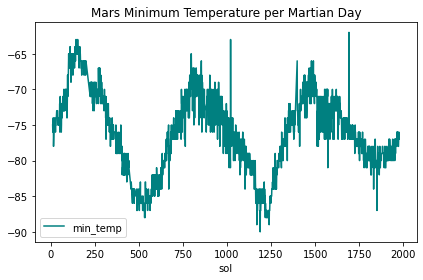

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sol_sorted = df.sort_values('sol').reset_index(drop=True)

sol_sorted.plot(x='sol', y='min_temp', color='teal', title='Mars Minimum Temperature per Martian Day')
                
# descriptives              
# plt.xlabel='Terrestrial Days (sol)'
# plt.ylabel='Minimum Temperature °C'
                       
plt.savefig("Images/Mars Minimum Temperature per Martian Day")

plt.tight_layout() 

plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv('./Output/mars_weather.csv', index=False)

In [25]:
browser.quit()